In [1]:
import numpy as np
import pandas as pd

import os
import glob

from subprocess import call

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# number of frames per video fixed upfront
nFrames_Video = 20

In [3]:
dfFiles = pd.read_csv("../datasets/04-chalearn/_zip/train.txt", sep=" ", header=None, \
                      names=["sVideoPath", "s2", "nLabel"])

In [4]:
dfFiles.tail()

,sVideoPath,s2,nLabel
35873,train/180/M_35874.avi,train/180/K_35874.avi,28
35874,train/180/M_35875.avi,train/180/K_35875.avi,33
35875,train/180/M_35876.avi,train/180/K_35876.avi,1
35876,train/180/M_35877.avi,train/180/K_35877.avi,14
35877,train/180/M_35878.avi,train/180/K_35878.avi,162


In [5]:
dfFiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35878 entries, 0 to 35877
Data columns (total 3 columns):
sVideoPath    35878 non-null object
s2            35878 non-null object
nLabel        35878 non-null int64
dtypes: int64(1), object(2)
memory usage: 841.0+ KB


In [6]:
seLabels = dfFiles.groupby("nLabel").size().sort_values(ascending=False)

In [7]:
print("%d videos, with %d labels, occuring between %d-%d times" % (len(dfFiles), len(seLabels), min(seLabels), max(seLabels)))

35878 videos, with 249 labels, occuring between 64-851 times


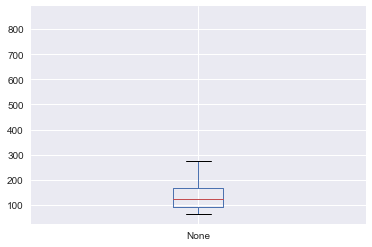

In [8]:
seLabels.plot.box()
#plt.plot(list(seLabels))

In [9]:
# split train vs val data
fTest = 0.2
dfFiles["sTrain_val"] = "train"

In [10]:
for g in dfFiles.groupby("nLabel"):
    pos = g[1].sample(frac = fTest).index
    dfFiles.loc[pos, "sTrain_val"] = "val"

In [11]:
dfFiles.groupby("sTrain_val").size()

sTrain_val
train    28705
val       7173
dtype: int64

In [12]:
dfFiles.head()

,sVideoPath,s2,nLabel,sTrain_val
0,train/001/M_00001.avi,train/001/K_00001.avi,26,train
1,train/001/M_00002.avi,train/001/K_00002.avi,19,train
2,train/001/M_00003.avi,train/001/K_00003.avi,20,train
3,train/001/M_00004.avi,train/001/K_00004.avi,135,train
4,train/001/M_00005.avi,train/001/K_00005.avi,152,train


In [17]:
se_li_sVideoPath = dfFiles.sVideoPath.apply(lambda s: s.split("/"))

In [25]:
dfFiles["sTrainVal"] = se_li_sVideoPath.apply(lambda s: s[0])
dfFiles["sFileName"] = se_li_sVideoPath.apply(lambda s: s[2])
dfFiles.head()

,sVideoPath,s2,nLabel,sTrain_val,sTrainVal,sFileName
0,train/001/M_00001.avi,train/001/K_00001.avi,26,train,train,M_00001.avi
1,train/001/M_00002.avi,train/001/K_00002.avi,19,train,train,M_00002.avi
2,train/001/M_00003.avi,train/001/K_00003.avi,20,train,train,M_00003.avi
3,train/001/M_00004.avi,train/001/K_00004.avi,135,train,train,M_00004.avi
4,train/001/M_00005.avi,train/001/K_00005.avi,152,train,train,M_00005.avi


In [83]:
seDir3 = dfFiles.sVideoPath.apply(lambda s: s.split("/")[2])
seDir3 = seDir3.apply(lambda s: s.split(".")[0])

In [88]:
dfFiles["sFrameDir"] = dfFiles.sTrain_val + "/" + dfFiles.nLabel.astype("str") + "/" + seDir3

In [89]:
dfFiles.head()

,sVideoPath,s2,nLabel,sTrain_val,sFrameDir
0,train/001/M_00001.avi,train/001/K_00001.avi,26,train,train/26/M_00001
1,train/001/M_00002.avi,train/001/K_00002.avi,19,train,train/19/M_00002
2,train/001/M_00003.avi,train/001/K_00003.avi,20,train,train/20/M_00003
3,train/001/M_00004.avi,train/001/K_00004.avi,135,val,val/135/M_00004
4,train/001/M_00005.avi,train/001/K_00005.avi,152,train,train/152/M_00005


In [76]:
os.getcwd()

'/Users/Frederik/Dev/sign-language/03-transferlearning'

In [82]:
len(glob.glob("data/1-frame/*/*/*/*.jpg"))

200

In [47]:
# how many videos in first n classes?
seLabels.sort_index().cumsum().head(10)

nLabel
1      161
2      324
3      499
4      677
5     1528
6     1699
7     1873
8     2248
9     2419
10    2774
dtype: int64

In [49]:
dfLabels = pd.DataFrame(seLabels, columns=["occurances"]).reset_index()
dfLabels.head()

,nLabel,occurances
0,5,851
1,19,492
2,38,459
3,37,377
4,8,375


In [50]:
dfLabels["sLabel"] = dfLabels.nLabel.astype(str)

In [51]:
dfLabels = dfLabels.sort_values("sLabel").reset_index()
dfLabels.head(10)

,index,nLabel,occurances,sLabel
0,78,1,161,1
1,6,10,355,10
2,199,100,85,100
3,216,101,82,101
4,191,102,87,102
5,220,103,80,103
6,166,104,104,104
7,178,105,96,105
8,186,106,91,106
9,196,107,86,107


In [52]:
dfLabels.occurances.cumsum().head(10)

0     161
1     516
2     601
3     683
4     770
5     850
6     954
7    1050
8    1141
9    1227
Name: occurances, dtype: int64